In [1]:
!pip install d2l==1.0.3


In [25]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [26]:
# Defining the class
class LinearRegression(d2l.Module):  
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) #defines # of outputs only
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [27]:
@d2l.add_to_class(LinearRegression)  
def forward(self, X): #forward method has a built in call function
    return self.net(X)

In [28]:
# Loss function
import torch.nn.functional as F

@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    delta = 1.0  # Adjust this value based on your preference
    
    # Huber loss
    loss = F.smooth_l1_loss(y_hat, y, reduction='mean', beta=delta)
    
    return loss

In [29]:
# Optimization
@d2l.add_to_class(LinearRegression)  
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

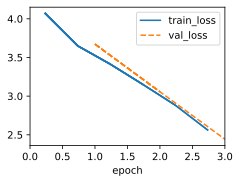

In [43]:
# Training the Data
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [31]:
# Visualizing loss
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

In [32]:
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 1.5785, -1.7465])
error in estimating b: tensor([1.8988])


In [33]:
# Appending the Linear Regression Class
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
        return (self.net.weight.data, self.net.bias.data)

In [47]:
# Varying the amount of data and plotting estimation error
data_sizes = [10, 20, 50, 100, 200]  # Vary the amount of data

weight_errors = []
bias_errors = []

for size in data_sizes:
    model = LinearRegression(lr=0.03)
    data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
    data.X = data.X[:size]
    data.y = data.y[:size]
    trainer = d2l.Trainer(max_epochs=100)
    trainer.fit(model, data)

    w, b = model.get_w_b()
    w_error = torch.norm(data.w - w.reshape(data.w.shape)).item()
    b_error = torch.norm(data.b - b).item()

    weight_errors.append(w_error)
    bias_errors.append(b_error)

In [48]:
# Plotting errors
plt.plot(data_sizes, weight_errors, label='Weight Error')
plt.plot(data_sizes, bias_errors, label='Bias Error')
plt.xlabel('Amount of Data')
plt.ylabel('Error')
plt.title('Estimation Errors vs. Amount of Data')
plt.legend()
plt.show()